In [41]:
%load_ext autoreload
%autoreload 2

import math
import sys
import matplotlib.pyplot as plt

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, plot_ratings_mses_s3, s3_load_trial
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import *
from reclab.recommenders import Llorma, LibFM, TopPop, PerfectRec, KNNRecommender, EASE, Autorec, RandomRec


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_names = ['topics_static_small']
recommender_names = ['Llorma', 'LibFM']


for env_name in env_names:

    if env_name == 'topics_static':
        ENV_PARAMS = TOPICS_STATIC
    elif env_name == 'topics_dynamic':
        ENV_PARAMS = TOPICS_DYNAMIC
    elif env_name == 'latent_static':
        ENV_PARAMS = LATENT_STATIC
    elif env_name == 'latent_dynamic':
        ENV_PARAMS = LATENT_DYNAMIC
    elif env_name == 'topics_static_small':
        ENV_PARAMS = TOPICS_STATIC_SMALL
    elif env_name == 'topics_dynamic_small':
        ENV_PARAMS = TOPICS_DYNAMIC_SMALL
    elif env_name == 'latent_static_small':
        ENV_PARAMS = LATENT_STATIC_SMALL
    elif env_name == 'latent_dynamic_small':
        ENV_PARAMS = LATENT_DYNAMIC_SMALL
    else:
        assert False, "environment not implemented!"


    # Experiment setup.
    n_trials = 3
    trial_seeds = [i for i in range(n_trials)]
    num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']
    len_trial = get_len_trial(ENV_PARAMS)
    num_users = ENV_PARAMS['params']['num_users']

    environment_name = ENV_PARAMS['name']
    env_name = ENV_PARAMS['name']

    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=False,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    

In [108]:
bucket_name = 'recsys-eval'
data_dir = 'master'

recommender_names = ['Llorma']
n_trials = 1
trial_seeds = [i for i in range(n_trials)]

llorma_params = {
                "max_item": 1700,
                "max_user": 1000,
                "result_path": "results_static2",
                'n_anchor': 10, 
                  'pre_rank': 10, 
                  'pre_learning_rate': 5e-4,
                  'pre_lambda_val': 0.01,
                  'pre_train_steps': 100,
                  'rank': 20,
                  'learning_rate': 2e-2,
                  'lambda_val': 1e-4,
                  'train_steps': 50,
                  'batch_size': 1000,
                "use_cache": True}

recommenders = [
    Llorma(**llorma_params)
]

In [109]:
env = Topics(**TOPICS_STATIC['params'], **TOPICS_STATIC['optional_params'])
environment_names = [TOPICS_STATIC['name']]
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                recommenders=recommenders,
                                trial_seeds=trial_seeds,
                                len_trial=20,
                                environment_names=environment_names,
                                recommender_names=recommender_names,
                                bucket_name=bucket_name,
                                data_dir=data_dir,
                                overwrite=True)

Started experiments on environment: topics_static
	Initial density: 5.88235294117647%, Final density: 6.11764705882353%, Good item density: 29.654588235294117%
Running trials for recommender: Llorma
Running trial with seed: 0
Pre-train step: 10, train_error:1.3251818842964278
Pre-train step: 20, train_error:1.2312693446099936
Pre-train step: 30, train_error:1.122666036493728
Pre-train step: 40, train_error:1.0493140673883805
Pre-train step: 50, train_error:0.9904357697278328
Pre-train step: 60, train_error:0.9421396576142255
Pre-train step: 70, train_error:0.9031645642869242
Pre-train step: 80, train_error:0.8721008385369596
Pre-train step: 90, train_error:0.848576650255481
Pre-train step: 100, train_error:0.833123741129744
Train step:10, train error: 1.1803682841508822, test error: 1.1803682841508822
Train step:20, train error: 0.919795483504958, test error: 0.919795483504958
Train step:30, train error: 0.6289082879513547, test error: 0.6289082879513547
Train step:40, train error: 0.3

Low: 2.298, Mean: 2.976, High: 3.660
Pre-train step: 10, train_error:1.3274427304053817
Pre-train step: 20, train_error:1.23149706312372
Pre-train step: 30, train_error:1.1192928920205074
Pre-train step: 40, train_error:1.0425751119632436
Pre-train step: 50, train_error:0.9814071344691356
Pre-train step: 60, train_error:0.9312473523678568
Pre-train step: 70, train_error:0.891332108190302
Pre-train step: 80, train_error:0.8615443998233207
Pre-train step: 90, train_error:0.840980410027398
Pre-train step: 100, train_error:0.8280753033582487
Train step:10, train error: 1.1374822217392504, test error: 1.1374822217392504
Train step:20, train error: 0.8523533688437603, test error: 0.8523533688437603
Train step:30, train error: 0.5983720652267833, test error: 0.5983720652267833
Train step:40, train error: 0.37460333112037564, test error: 0.37460333112037564
Train step:50, train error: 0.24797280563693871, test error: 0.24797280563693871
Low: 2.251, Mean: 2.985, High: 3.722
Pre-train step: 10, 

Train step:30, train error: 0.5877021646925612, test error: 0.5877021646925612
Train step:40, train error: 0.3588536577646485, test error: 0.3588536577646485
Train step:50, train error: 0.239926982836537, test error: 0.239926982836537
Low: 2.274, Mean: 2.988, High: 3.708
Pre-train step: 10, train_error:1.3321243903007354
Pre-train step: 20, train_error:1.2315707032514547
Pre-train step: 30, train_error:1.1126141656563526
Pre-train step: 40, train_error:1.0262160912256006
Pre-train step: 50, train_error:0.9619028551463215
Pre-train step: 60, train_error:0.9142194426885506
Pre-train step: 70, train_error:0.8799496377714638
Pre-train step: 80, train_error:0.856169989508308
Pre-train step: 90, train_error:0.8401106384154575
Pre-train step: 100, train_error:0.8301879698146173
Train step:10, train error: 1.133801236878922, test error: 1.133801236878922
Train step:20, train error: 0.8500610208395672, test error: 0.8500610208395672
Train step:30, train error: 0.5843442431694017, test error: 0.

Pre-train step: 90, train_error:0.8246733384527399
Pre-train step: 100, train_error:0.8175716955547685
Train step:10, train error: 1.0983101779529683, test error: 1.0983101779529683
Train step:20, train error: 0.8158702242576666, test error: 0.8158702242576666
Train step:30, train error: 0.5540315176087347, test error: 0.5540315176087347
Train step:40, train error: 0.34901070865889283, test error: 0.34901070865889283
Train step:50, train error: 0.23953770319649006, test error: 0.23953770319649006
Low: 2.206, Mean: 2.973, High: 3.754
Pre-train step: 10, train_error:1.3398169828518478
Pre-train step: 20, train_error:1.2382112629370554
Pre-train step: 30, train_error:1.108248198429743
Pre-train step: 40, train_error:1.0096203014803289
Pre-train step: 50, train_error:0.9390333451161487
Pre-train step: 60, train_error:0.887170047680783
Pre-train step: 70, train_error:0.8510048968883096
Pre-train step: 80, train_error:0.8301088646627477
Pre-train step: 90, train_error:0.8191800695233197
Pre-

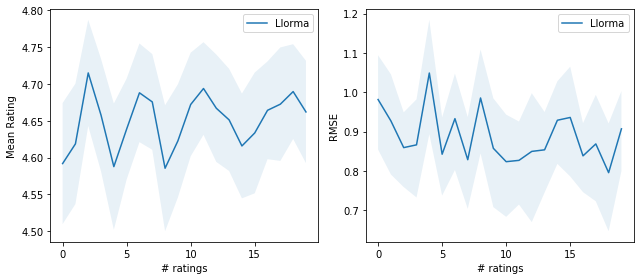

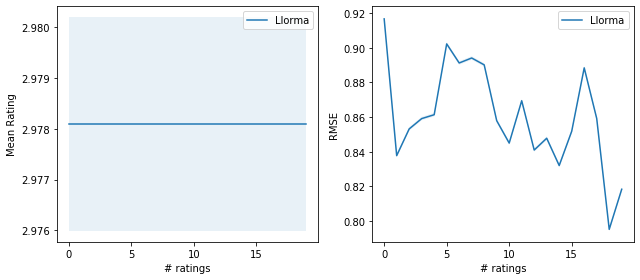

In [110]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 50 steps of re-pre-train

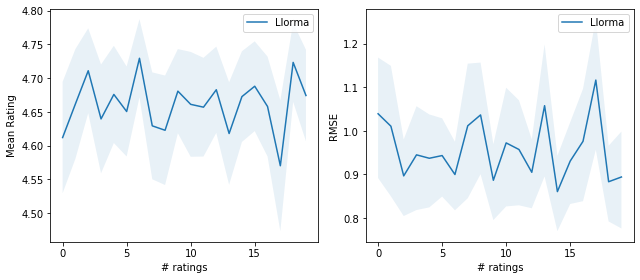

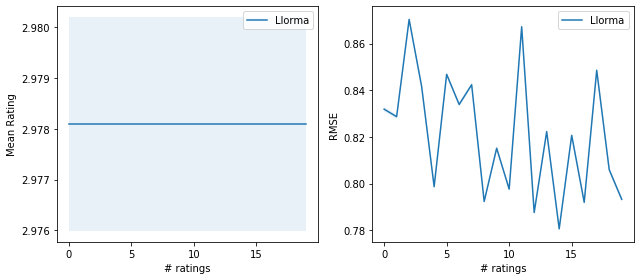

In [107]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 100 steps + re-pre-train

In [72]:
get_len_trial(TOPICS_STATIC)

500